<a href="https://colab.research.google.com/github/imnate/AI-Trainning/blob/master/%5BLecture2%5DNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2 : Neural Networks

### Please access this notebook at: https://github.com/sangaer/PracticalMachineLearning2019
### Once finished, please [Submit Your Colab Notebook Here](https://forms.gle/RjqyyLsVH9Qgf4VaA)

## recap for Lecture 1

### Kaggle
access kaggle data

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog
!unzip -q cat-and-dog.zip 

 94% 205M/218M [00:01<00:00, 150MB/s]
100% 218M/218M [00:01<00:00, 129MB/s]


### pandas

In [0]:
import pandas as pd #pandas = excel

In [0]:
# load csv dataset
FILE_TRAIN = 'sample_data/california_housing_train.csv'
FILE_TEST = 'sample_data/california_housing_test.csv'
df_train = pd.read_csv(FILE_TRAIN)
df_test = pd.read_csv(FILE_TEST)

In [0]:
# glace
df_test.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0


In [0]:
# get shape
df_train.shape

(17000, 9)

In [0]:
# get column names
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [0]:
# select a column as "Series"
longitude = df_train['longitude']

In [0]:
# indexing
df_train.iloc[10:15, :5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms
10,-114.60,33.62,16.0,3741.0,801.0
11,-114.60,33.60,21.0,1988.0,483.0
12,-114.61,34.84,48.0,1291.0,248.0
13,-114.61,34.83,31.0,2478.0,464.0
14,-114.63,32.76,15.0,1448.0,378.0


### numpy

In [0]:
import numpy as np

In [0]:
# array declare

# toy data
x_train = np.array([[1, 40], 
                    [2, 30],
                    [4, 10]])

y_train = np.array([2, 3, 5])

x_test = np.array([[3, 20],])
y_test = np.array([4])


# toy model
w = np.array([1, 0])
b = 1

In [0]:
# metrix transpose
x_train.T

array([[ 1,  2,  4],
       [40, 30, 10]])

In [0]:
# inner product, boardcasting
np.dot(w, x_train.T) + b

array([2, 3, 5])

In [0]:
# elementwise multiply
print(x_train)
x_train * x_train

[[ 1 40]
 [ 2 30]
 [ 4 10]]


array([[   1, 1600],
       [   4,  900],
       [  16,  100]])

###               scikit-learn

normalize

In [0]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
x_train_norm = normalizer.fit_transform(x_train)
x_train_norm

array([[-1.06904497,  1.06904497],
       [-0.26726124,  0.26726124],
       [ 1.33630621, -1.33630621]])

modeling

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(normalizer.fit_transform(x_train), y_train)
predict = reg.predict(normalizer.transform(x_test))

print('\nx_train: \n{}\n\ny_train: \n{}'.format(x_train, y_train))
print('\nx_test: \n{}\n\npredict: \n{}'.format(x_test, predict))


x_train: 
[[ 1 40]
 [ 2 30]
 [ 4 10]]

y_train: 
[2 3 5]

x_test: 
[[ 3 20]]

predict: 
[4.]


#  
## Train / Valid / Test split
Pattern Recognition and Neural Networks (Brian D. Ripley, 1996)
#### **Training Set:**
       - A set of examples used for learning, which is to fit the parameters [i.e., weights] of the classifier.
        
        
#### - **Validation Set:** 
       - A set of examples used to tune the parameters [i.e., architecture, not weights] of a classifier, for example to choose the number of hidden units in a neural network.
        
        
#### - **Test Set:** 
       - A set of examples used only to assess the performance [generalization] of a fully specified classifier.


#  
## Logistic Regression

#### predict: 
## $$ Z = f(W^TX + b) $$ 

#### optimize:
## $$ W \leftarrow W - learning\_rate * \frac{\partial loss}{\partial W} $$
## $$ b \leftarrow b - learning\_rate * \frac{\partial loss}{\partial b} $$


#  
# Neural Networks from craft

In [0]:
import os
import cv2
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt
from IPython.display import clear_output

np.random.seed(0)

### forward propagation
#### NOTE: We need activation functions for breaking the linearity

![ref: wikipidia MLP](https://drive.google.com/uc?id=1-3sYn5zZMHejRQHg33ngdRNOGGvsmGmt)
### $$ Z_{0} = f_{0}(W_{0}^TX_{0} + b_{0}) $$ 
### $$ Z_{1} = f_{1}(W_{1}^TZ_{0} + b_{1}) $$ 
### $$ Z_{2} = f_{2}(W_{2}^TZ_{1} + b_{2}) $$ 
$$.$$
$$.$$
$$.$$
### $$ Z_{n} = f_{n}(W_{n}^TZ_{n-1} + b_{n}) $$ 
#### \begin{cases}
        b_n: bias\\
        W_n: weight\\
        X_n: layer\_input\\
        f_n: activation\_functions\\
        Z_n: layer\_output
        \end{cases} 


### backpropagation
#### NOTE
* "Derivative" is necessary for optimize with backpropagation.
* "Weights" should be initialize with non-symmetry(we usually initialize them in random) parameters is necessary for optimize with backpropagation.
#### [appendix: Backpropagation](https://en.wikipedia.org/wiki/Backpropagation)

In [0]:
class Layer(ABC):
    
    weights = None
    
    def __init__(self):
        pass
    
    @abstractmethod
    def forward(self, layer_x):
        raise NotImplementedError
        
    @abstractmethod
    def derivative(self, layer_x):
        raise NotImplementedError
    
    def w(self, layer_x):
        return self.weights if self.weights is not None else np.eye(layer_x.shape[1])
    
    def backward(self, layer_x, grad_output):
        return np.dot(grad_output, self.w(layer_x).T) * self.derivative(layer_x)

In [0]:
# TypeError is expected here. You cannot instantiate class with abstract methods.
layer = Layer()

TypeError: ignored

### activation functions
reference: [wikipedia](https://en.wikipedia.org/wiki/Activation_function)

## Sigmoid
## $$ \sigma(x) = \frac{1}{1+e^{-x}}$$
## $$ \sigma'(x) = \sigma(x)(1-\sigma(x))$$
#### \begin{cases}
        \sigma(\infty) = 1\\
        \sigma(0) = 0.5\\
        \sigma(-\infty) = 0
        \end{cases} 

In [0]:
class Sigmoid(Layer):
    
    def __init__(self):
        pass 
    
    def forward(self, layer_x):
        return 1/(1+np.exp(-layer_x))
    
    def derivative(self, layer_x):
        return self.forward(layer_x) * (1-self.forward(layer_x))


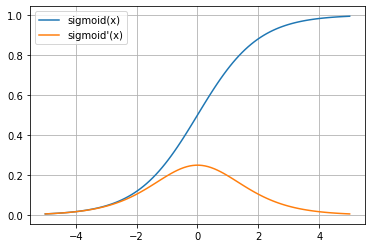

In [0]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)
y =  Sigmoid().forward(x)
y_ = Sigmoid().derivative(x)
plt.plot(x,y, label='sigmoid(x)')
plt.plot(x,y_, label='sigmoid\'(x)')
plt.grid()
plt.legend()
plt.show()

#  
#  

## Identity
## $$ I(x) = x $$
## $$ I'(x) = 1 $$


In [0]:
class Identity(Layer):
    
    def __init__(self):
        pass 
    
    def forward(self, layer_x):
        return layer_x
    
    def derivative(self, layer_x):
        return np.ones(layer_x.shape)


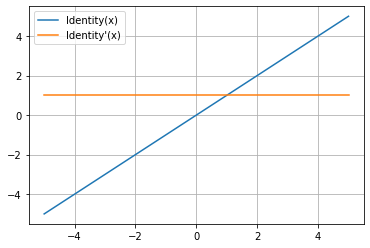

In [0]:
x = np.linspace(-5, 5, 1000).reshape(-1, 1)
y = Identity().forward(x)
y_ = Identity().derivative(x)
plt.plot(x, y, label='Identity(x)')
plt.plot(x, y_, label='Identity\'(x)')
plt.grid()
plt.legend()
plt.show()

#  
#  

## Rectified Linear Unit (ReLU)
## $$ 
ReLU(x) = \begin{cases}
        x,  & \text{for x >= 0}\\
        0, & \text{for x < 0}
        \end{cases} 
        $$
## $$ 
ReLU'(x) = \begin{cases}
        1,  & \text{for x > 0}\\
        0, & \text{for x < 0}
        \end{cases} 
        $$

In [0]:
class ReLU(Layer):
    
    def forward(self, layer_x):
        layer_y = np.maximum(0, layer_x)
        return layer_y

    def derivative(self, layer_x):
        return layer_x > 0


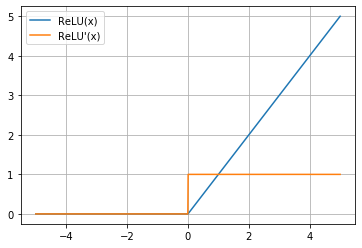

In [0]:
x = np.linspace(-5, 5, 1000).reshape(-1, 1)
y = ReLU().forward(x)
y_ = ReLU().derivative(x)
plt.plot(x, y, label='ReLU(x)')
plt.plot(x, y_, label='ReLU\'(x)')
plt.grid()
plt.legend()
plt.show()


## Softmax and logit
#### logit: not normalized probability distribution.

## $$ Softmax(x)_i = \frac {e^{x_i}}{\sum _j e^{x_j}} $$
#### $$softmax(x+c)_i = \frac {e^{(x_i+c)}}{\sum _j e^{(x_j+c)}} = \frac {e^{c}e^{x_i}}{e^{c}\sum _j e^{x_j}} = \frac {e^{x_i}}{\sum _j e^{x_j}} = softmax(x)$$

In [0]:
class Softmax(Layer):
    
    def forward(self, layer_x):
        return np.exp(layer_x) / np.exp(layer_x).sum(axis=-1, keepdims=True)    

    def derivative(self, layer_x):
        return layer_x * (1 - layer_x)

In [0]:
logit = np.array([[1.0, 4.0], 
                  [2.0, 2.0],
                  [2.1, 1.9]])

In [0]:
prediction = logit.argmax(axis=-1)
prediction

array([1, 0, 0])

In [0]:
propability = Softmax().forward(logit)
propability

array([[0.04742587, 0.95257413],
       [0.5       , 0.5       ],
       [0.549834  , 0.450166  ]])

In [0]:
propability.sum(axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.]])

#  
# **Dense** (Feed-Forward Layer)
#### a layer of gradient decent linear regression

In [0]:
class Dense(Layer):

    def __init__(self, input_units, output_units, learning_rate=0.1):
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))  # [xavier initialization](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
        self.biases = np.zeros(output_units)
        
    def forward(self, layer_x):        
        return np.dot(layer_x, self.weights) + self.biases
    
    def derivative(self, layer_x):
        return 1
    
    def backward(self, layer_x, grad_output):
        grad_input = np.dot(grad_output, self.w(layer_x).T) * self.derivative(layer_x)

        grad_weights = np.dot(layer_x.T, grad_output)
        grad_biases = grad_output.mean(axis=0) * layer_x.shape[0]
        
        assert grad_weights.shape == self.weights.shape
        assert grad_biases.shape == self.biases.shape

        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

## Loss Functions

### for binary classification:
$$ cross\_entropy = -\frac{1}{m}\sum_{i=1}^{m} y*log(y_{predict}) + (1-y)*log(1-y_{predict})$$
### for general case:
$$ cross\_entropy = -\frac{1}{m}\sum_{i=1}^{m}\sum_{c}^{C}y_{c}*log (y_{c\_predict}) $$

In [0]:
class SoftmaxCrossentropyWithLogits:
    
    def softmax(self, layer_x):
        return np.exp(layer_x) / np.exp(layer_x).sum(axis=-1, keepdims=True)    
    
    def loss(self, logits, reference_answers):
        logits_for_answers = logits[np.arange(len(logits)), reference_answers]
        xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
        return xentropy
    
    def gradient(self, logits, reference_answers):
        ones_for_answers = np.zeros_like(logits)
        ones_for_answers[np.arange(len(logits)), reference_answers] = 1
        softmax = self.softmax(logits)
        return (- ones_for_answers + softmax) / logits.shape[0]

## Gradient Descent / Mini-Batch Gradient Descent / Stochastic Gradient Descent(SGD)
#  

### Gradient Descent
```python
model.fit(x, y)
```
###  

### Mini-Batch Gradient Descent


In [0]:
import time
batch_size = 100
x = np.zeros([500, 1])
for b, i in enumerate(range(0, len(x), batch_size)):
    print('batch {}  indices {}:{}'.format(b, i, i+batch_size))
    time.sleep(0.1)

batch 0  indices 0:100
batch 1  indices 100:200
batch 2  indices 200:300
batch 3  indices 300:400
batch 4  indices 400:500


```python
for i in range(0, len(x), batch_size):
    model.fit(x[i: i+batch_size], y[i: i+batch_size])
```
##  

### Stochastic Gradient Descent(SGD)

```python
for i in range(0, len(x), 1):
    model.fit(x[i: i+batch_size], y[i: i+batch_size])
```

In [0]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [0]:
class MLPClassifier:
    
    def __init__(self, layers, loss_function):
        self.loss_function = loss_function
        self.network = layers
    
    def forward(self, x):

        activations = []
        layer_x = x
        for l in self.network:
            activations.append(l.forward(layer_x))
            layer_x = activations[-1]
        assert len(activations) == len(self.network)
        return activations

    def predict(self, x):
        logits = self.forward(x)[-1]
        return logits.argmax(axis=-1)
    
    def loss(self, x, y):

        layer_activations = self.forward(x)
        layer_inputs = [x] + layer_activations
        logits = layer_activations[-1]

        loss = self.loss_function.loss(logits, y)
        return np.mean(loss)
        
    def train(self, x, y):

        layer_activations = self.forward(x)
        layer_inputs = [x] + layer_activations
        logits = layer_activations[-1]

        loss = self.loss_function.loss(logits, y)
        loss_grad = self.loss_function.gradient(logits, y)

        for layer_index in range(len(self.network))[::-1]:
            layer = network[layer_index]

            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad)

        return np.mean(loss)

# Cat vs Dog dataset
#### kaggle : tongpython/cat-and-dog

In [0]:
def dataset_parse(folders, size=(32, 32)):
    
    if isinstance(folders, str):
        folders = [folders, ]

    features = list()
    labels = list()

    for folder in folders:
        for root, dirs, files in os.walk(folder):
            for f in filter(lambda x: x.endswith('.jpg'), files):
                img = cv2.resize(cv2.imread(os.path.join(root, f)), size)
                label = os.path.basename(root)
                
                labels.append(label)
                features.append(img)

    df = pd.DataFrame({'img':features, 'category': labels})
    df = df.sample(frac=1).reset_index(drop=True)
    return df

data_test ='test_set/test_set/'
data_train ='training_set/training_set/'

df = dataset_parse([data_test, data_train], size=(32, 32))

print('df.shape:', df.shape)

x = np.concatenate(df['img'].apply(lambda x: x.reshape(1, -1)).values) /256
y = df['category'].apply(lambda x: 1 if x=='cats' else 0).values

i = 9000
j = 9200
x_train = x[:i]
y_train = y[:i]
x_val = x[i:j]
y_val = y[i:j]
x_test = x[j:]
y_test = y[j:]

print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)
print('x_val.shape', x_val.shape)
print('y_val.shape', y_val.shape)
print('x_test.shape', x_test.shape)
print('y_test.shape', y_test.shape)

df.shape: (10028, 2)
x_train.shape (9000, 3072)
y_train.shape (9000,)
x_val.shape (200, 3072)
y_val.shape (200,)
x_test.shape (828, 3072)
y_test.shape (828,)


# modeling

In [0]:
# ↓↓↓↓↓↓↓↓↓↓↓↓↓ You can modify this block for improve the performance. ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓


learning_rate = 0.01

network = list()
network.append(Dense(x_train.shape[1], 32, learning_rate=learning_rate))#layer 1 
network.append(ReLU())

network.append(Dense(32, 32, learning_rate=learning_rate))#layer 2
network.append(ReLU())

network.append(Dense(32, len(set(y_train)), learning_rate=learning_rate))#output

clf = MLPClassifier(network, loss_function=SoftmaxCrossentropyWithLogits())


# ↑↑↑↑↑↑↑↑↑↑↑↑↑ You can modify this block for improve the performance. ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

In [0]:
# ↓↓↓↓↓↓↓↓↓↓↓↓↓ You can modify this block for improve the performance. ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

N_Epoch = 300
BATCH_SIZE = 32

# ↑↑↑↑↑↑↑↑↑↑↑↑↑ You can modify this block for improve the performance. ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

Epoch 299
Train loss: 0.000478024258192003
Val loss: 3.4522306243163827
Train accuracy: 1.0
Val accuracy: 0.585


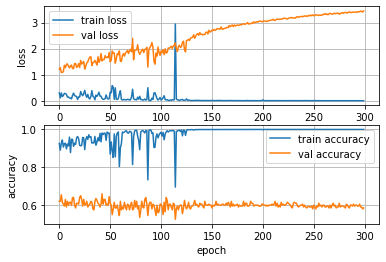

In [0]:
train_accs = list()
val_accs = list()
train_losses = list()
val_losses = list()

for epoch in range(`):
    for x_batch, y_batch in iterate_minibatches(x_train, y_train, batchsize=BATCH_SIZE,shuffle=True):
        train_loss = clf.train(x_batch, y_batch)
    val_loss = clf.loss(x_val, y_val)
    
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    train_accs.append(np.mean(clf.predict(x_train)==y_train))
    val_accs.append(np.mean(clf.predict(x_val)==y_val))
    
    
    
    clear_output()
    print("Epoch", epoch)
    print("Train loss:", train_losses[-1])
    print("Val loss:", val_losses[-1])
    print("Train accuracy:", train_accs[-1])
    print("Val accuracy:", val_accs[-1])
    
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(train_losses, label='train loss')
    ax[0].plot(val_losses, label='val loss')
    ax[0].legend(loc='best')
    ax[0].grid()
    ax[0].set_ylabel('loss')
    ax[1].plot(train_accs,label='train accuracy')
    ax[1].plot(val_accs,label='val accuracy')
    ax[1].legend(loc='best')
    ax[1].set_ylabel('accuracy')
    ax[1].grid()
    ax[1].set_xlabel('epoch')
    plt.show()

#### The model is ***overfitting***, when there are obvious leading performance from training set.

### ** SCORE 1/4 **

In [0]:

accuracy_score(clf.predict(x_test), y_test)

ValueError: ignored

#  
# mnist dataset: 
#### handwriting numbers(0-9) classification

In [0]:
df_train = pd.read_csv('sample_data/mnist_train_small.csv').sample(frac=1, random_state=0).reset_index(drop=True)
df_test = pd.read_csv('sample_data/mnist_test.csv')

x = df_train.iloc[:, 1:].values/256
y = df_train.iloc[:, 0].values

val_ratio = 0.1
val_splitter = int(x.shape[0] * (1-val_ratio))

x_train = x[:val_splitter]
y_train = y[:val_splitter]
x_val = x[val_splitter:]
y_val = y[val_splitter:]

x_test = df_test.iloc[:, 1:].values/256
y_test = df_test.iloc[:, 0].values

print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)
print('x_val.shape', x_val.shape)
print('y_val.shape', y_val.shape)
print('x_test.shape', x_test.shape)
print('y_test.shape', y_test.shape)

x_train.shape (17999, 784)
y_train.shape (17999,)
x_val.shape (2000, 784)
y_val.shape (2000,)
x_test.shape (9999, 784)
y_test.shape (9999,)


visualize the image

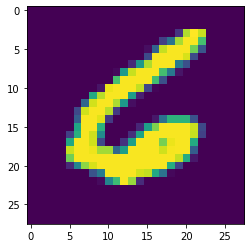

label: 6


In [0]:
i = 0
label = df_train.iloc[i, 0]
plt.imshow(df_train.iloc[i, 1:].values.reshape(28, 28))
plt.show()
print('label:', label)

# modeling

In [0]:
# ↓↓↓↓↓↓↓↓↓↓↓↓↓ You should finish this block for improve the performance. ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

learning_rate = 0.01

network = list()
network.append(Dense(x_train.shape[1], 32, learning_rate=learning_rate))#layer 1 
network.append(ReLU())

network.append(Dense(32, 32, learning_rate=learning_rate))#layer 2
network.append(ReLU())

network.append(Dense(32, len(set(y_train)), learning_rate=learning_rate))#output

clf = MLPClassifier(network, loss_function=SoftmaxCrossentropyWithLogits())

# ↑↑↑↑↑↑↑↑↑↑↑↑↑ You should finish this block for improve the performance. ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

In [0]:
# ↓↓↓↓↓↓↓↓↓↓↓↓↓ You should finish this block for improve the performance. ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
N_Epoch = 100
BATCH_SIZE = 32
# ↑↑↑↑↑↑↑↑↑↑↑↑↑ You should finish this block for improve the performance. ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

Epoch 99
Train loss: 0.011771668522684436
Val loss: 0.1922856235535297
Train accuracy: 0.9967775987554864
Val accuracy: 0.9455


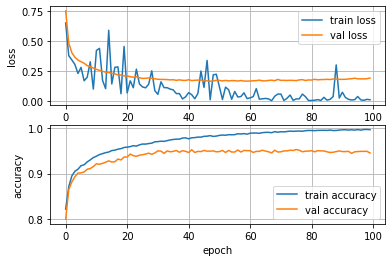

In [0]:
train_accs = list()
val_accs = list()
train_losses = list()
val_losses = list()

for epoch in range(N_Epoch):
    for x_batch, y_batch in iterate_minibatches(x_train, y_train, batchsize=BATCH_SIZE,shuffle=True):
        train_loss = clf.train(x_batch, y_batch)
    val_loss = clf.loss(x_val, y_val)
    
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    train_accs.append(np.mean(clf.predict(x_train)==y_train))
    val_accs.append(np.mean(clf.predict(x_val)==y_val))
    
    
    
    clear_output()
    print("Epoch", epoch)
    print("Train loss:", train_losses[-1])
    print("Val loss:", val_losses[-1])
    print("Train accuracy:", train_accs[-1])
    print("Val accuracy:", val_accs[-1])
    
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(train_losses, label='train loss')
    ax[0].plot(val_losses, label='val loss')
    ax[0].legend(loc='best')
    ax[0].grid()
    ax[0].set_ylabel('loss')
    ax[1].plot(train_accs,label='train accuracy')
    ax[1].plot(val_accs,label='val accuracy')
    ax[1].legend(loc='best')
    ax[1].set_ylabel('accuracy')
    ax[1].grid()
    ax[1].set_xlabel('epoch')
    plt.show()

### ** SCORE 2/4 **

In [0]:
accuracy_score(clf.predict(x_test), y_test)

0.9523952395239524

## keras within tensorflow 2.0

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# import tensorflow as tf
print('tf.__version__ = ', tf.__version__)

tf.__version__ =  1.15.0


# modeling

In [0]:
# ↓↓↓↓↓↓↓↓↓↓↓↓↓ You can modify this block for improve the performance. ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

N_Epoch = 100
BATCH_SIZE = 32

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(x_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(set(y_train)), activation='softmax')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss = tf.keras.losses.sparse_categorical_crossentropy

model.compile(optimizer=optimizer,
              loss=loss,             
              metrics=['acc'])

model.fit(x_train, y_train, epochs=N_Epoch, verbose=2, validation_data=(x_val, y_val), batch_size=BATCH_SIZE)

# ↑↑↑↑↑↑↑↑↑↑↑↑↑ You can modify this block for improve the performance. ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

Train on 17999 samples, validate on 2000 samples
Epoch 1/100
17999/17999 - 1s - loss: 1.4304 - acc: 0.5949 - val_loss: 0.7085 - val_acc: 0.8230
Epoch 2/100
17999/17999 - 1s - loss: 0.5254 - acc: 0.8600 - val_loss: 0.4584 - val_acc: 0.8735
Epoch 3/100
17999/17999 - 1s - loss: 0.3965 - acc: 0.8888 - val_loss: 0.3940 - val_acc: 0.8860
Epoch 4/100
17999/17999 - 1s - loss: 0.3470 - acc: 0.9001 - val_loss: 0.3604 - val_acc: 0.8980
Epoch 5/100
17999/17999 - 1s - loss: 0.3173 - acc: 0.9083 - val_loss: 0.3339 - val_acc: 0.9025
Epoch 6/100
17999/17999 - 1s - loss: 0.2954 - acc: 0.9135 - val_loss: 0.3289 - val_acc: 0.9005
Epoch 7/100
17999/17999 - 1s - loss: 0.2770 - acc: 0.9189 - val_loss: 0.3252 - val_acc: 0.9000
Epoch 8/100
17999/17999 - 1s - loss: 0.2628 - acc: 0.9227 - val_loss: 0.2886 - val_acc: 0.9130
Epoch 9/100
17999/17999 - 1s - loss: 0.2486 - acc: 0.9277 - val_loss: 0.2782 - val_acc: 0.9160
Epoch 10/100
17999/17999 - 1s - loss: 0.2372 - acc: 0.9312 - val_loss: 0.2653 - val_acc: 0.9210


### [Try some more optimizers! Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
### [Try some more loss functions!](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

### ** SCORE 3/4 **

In [0]:
accuracy_score(model.predict_classes(x_test), y_test)

0.9241924192419242

# California Housing Price dataset

In [0]:
normalizer = StandardScaler()
y_normalizer = StandardScaler()

df_train = pd.read_csv('sample_data/california_housing_train.csv').sample(frac=1, random_state=0).reset_index(drop=True)
df_test = pd.read_csv('sample_data/california_housing_test.csv')

x = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

val_ratio = 0.1
val_splitter = int(x.shape[0] * (1-val_ratio))

x_train = normalizer.fit_transform(x[:val_splitter])
y_train = y_normalizer.fit_transform(y[:val_splitter].reshape(-1, 1)).reshape(-1)

x_val = normalizer.transform(x[val_splitter:])
y_val = y_normalizer.transform(y[val_splitter:].reshape(-1, 1)).reshape(-1)

x_test = normalizer.transform(df_test.iloc[:, :-1])
y_test = y_normalizer.transform(df_test.iloc[:, -1].values.reshape(-1, 1)).reshape(-1)

print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)
print('x_val.shape', x_val.shape)
print('y_val.shape', y_val.shape)
print('x_test.shape', x_test.shape)
print('y_test.shape', y_test.shape)

# x_train.shape (17999, 784)
# y_train.shape (17999,)
# x_val.shape (2000, 784)
# y_val.shape (2000,)
# x_test.shape (9999, 784)
# y_test.shape (9999,)

x_train.shape (15300, 8)
y_train.shape (15300,)
x_val.shape (1700, 8)
y_val.shape (1700,)
x_test.shape (3000, 8)
y_test.shape (3000,)


# modeling

In [0]:
import tensorflow as tf

# ↓↓↓↓↓↓↓↓↓↓↓↓↓ You should finish this block for improve the performance. ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓

N_Epoch = 100
BATCH_SIZE = 32

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(x_train.shape[1], ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
loss = tf.keras.losses.MSE

model.compile(optimizer=optimizer,
              loss=loss,             
              metrics=['mae'])

model.fit(x_train, y_train, epochs=N_Epoch, verbose=2, validation_data=(x_val, y_val), batch_size=BATCH_SIZE)

# ↑↑↑↑↑↑↑↑↑↑↑↑↑ You should finish this block for improve the performance. ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

Train on 15300 samples, validate on 1700 samples
Epoch 1/100
15300/15300 - 1s - loss: 1.0255 - mean_absolute_error: 0.8020 - val_loss: 0.8027 - val_mean_absolute_error: 0.7051
Epoch 2/100
15300/15300 - 1s - loss: 0.6927 - mean_absolute_error: 0.6498 - val_loss: 0.5636 - val_mean_absolute_error: 0.5844
Epoch 3/100
15300/15300 - 1s - loss: 0.5144 - mean_absolute_error: 0.5497 - val_loss: 0.4590 - val_mean_absolute_error: 0.5168
Epoch 4/100
15300/15300 - 1s - loss: 0.4402 - mean_absolute_error: 0.4985 - val_loss: 0.4171 - val_mean_absolute_error: 0.4883
Epoch 5/100
15300/15300 - 1s - loss: 0.4057 - mean_absolute_error: 0.4733 - val_loss: 0.3947 - val_mean_absolute_error: 0.4669
Epoch 6/100
15300/15300 - 1s - loss: 0.3848 - mean_absolute_error: 0.4572 - val_loss: 0.3812 - val_mean_absolute_error: 0.4529
Epoch 7/100
15300/15300 - 1s - loss: 0.3699 - mean_absolute_error: 0.4457 - val_loss: 0.3716 - val_mean_absolute_error: 0.4428
Epoch 8/100
15300/15300 - 1s - loss: 0.3583 - mean_absolute_er

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true) * 100

### ** SCORE 4/4 **

In [0]:
print('y_predict:',x_test,',y_test_:',y_test)
y_predict = y_normalizer.inverse_transform(model.predict(x_test))
y_test_ = y_normalizer.inverse_transform(y_test)

for metrix in [mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_percentage_error]:
    print('{}: {}'.format(metrix.__name__, metrix(y_test_, y_predict)))

# accuracy_score(model.predict_classes(x_test), y_test)

y_predict: [[-1.23931142  0.81487118 -0.12531163 ...  0.09860978  0.27502827
   1.42302191]
 [ 0.63088323 -0.64064157  1.14803892 ... -0.56160781 -0.5870017
  -0.14845253]
 [ 0.87525533 -0.86528662 -0.12531163 ...  0.05054449 -0.01580859
   0.99740011]
 ...
 [-0.06732277  0.31409991 -1.4782466  ... -0.66680731 -0.73635036
  -0.83223581]
 [ 1.21937115 -0.71552325  0.90928569 ... -1.25356663 -1.27610165
  -0.31982914]
 [-0.03241247 -0.56575988  1.06845451 ... -0.61239378 -0.63154429
   2.44245688]] ,y_test_: [ 1.1815273  -0.26555207  0.54316054 ... -1.25063285 -0.38599863
  2.51763236]
mean_absolute_error: 40974.031369140626
mean_squared_error: 3541711781.231422
mean_absolute_percentage_error: 72.65394709733758
mean_percentage_error: -33.543820568455196


#  
#  


### Once finished, please [Submit Your Colab Notebook Here](https://forms.gle/RjqyyLsVH9Qgf4VaA)

##### Next lecture(10, Dec, 2019), we will introduce some trainning issues(e.g. underfitting, overfitting) and techniques for dealing them.

In [0]:
!date +%Y%m%d_%H%M%S

20191126_072025
